In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing

In [2]:
df = pd.read_csv('bank-direct-marketing-campaigns.csv')
print(df.shape)

# Divide the variables into numerical, categorical & target variable
nums = [
    'age',
    'campaign',
    'pdays',
    'previous',
    'emp.var.rate', 
    'cons.price.idx', 
    'cons.conf.idx',
    'euribor3m', 
    'nr.employed'
]

cats = [
    'job', 
    'marital', 
    'education', 
    'default', 
    'housing', 
    'loan',
    'contact', 
    'month', 
    'day_of_week',
    'poutcome'
]

y = 'y'

# Replace the value 999 in 'pdays' column to 1
df['pdays'] = df['pdays'].replace(999, -1)

# Convert to natural log to reduce variance
df['nr.employed'] = df['nr.employed'].map(lambda x: np.log(x))

# Label Encoding
from sklearn.preprocessing import LabelEncoder

# Perform label encoding on categorical columns & target variable
df[cats] = df[cats].apply(LabelEncoder().fit_transform)
df[['y']] = df[['y']].apply(LabelEncoder().fit_transform)

(41188, 20)


## Feature Selection

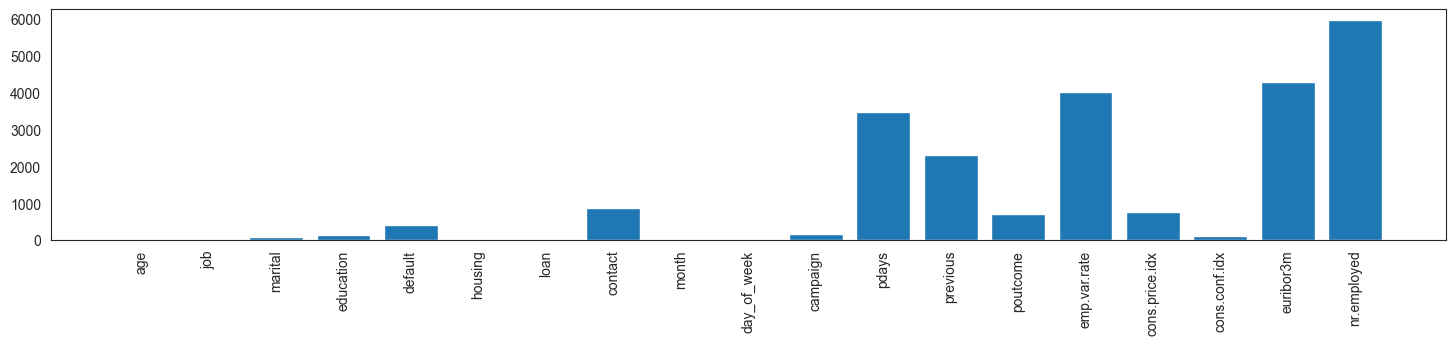

In [3]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif

# Set the independent and dependent variables
X = df.drop(['y'], axis=1)
y = df['y']

selector = SelectKBest(f_classif, k=10).fit(X, y)
x_new = selector.transform(X) # not needed to get the score
scores = selector.scores_

sns.set_style('white')
plt.figure(figsize=(18, 3))
plt.bar((range(X.shape[1])), scores)
plt.xticks(range(X.shape[1]), list(X), rotation='vertical')
plt.show()

In [4]:
# Clustering to add features
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cls = KMeans(n_clusters=4, random_state=42)
x_add = cls.fit_transform(x_new)

score = silhouette_score(x_new, cls.labels_, random_state=42)

print(x_add.shape)
print(x_add[:2])
print(score)

c:\Users\Leong Pit Khien\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(41188, 4)
[[ 1.33858903  5.12531614 11.68675445  9.2232098 ]
 [ 1.5080946   5.2001954  11.70731318  9.27320414]]
0.5744558666845238


In [5]:
x_new = np.hstack((x_new, x_add))

print(x_new.shape)
print(x_new[:2])

(41188, 14)
[[ 0.          1.          1.         -1.          0.          1.
   1.1        93.994       4.857       8.55468164  1.33858903  5.12531614
  11.68675445  9.2232098 ]
 [ 1.          1.          1.         -1.          0.          1.
   1.1        93.994       4.857       8.55468164  1.5080946   5.2001954
  11.70731318  9.27320414]]


## Dimensionality Reduction

In [6]:
# Dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=8, random_state=42)
pca.fit(x_new)

print("Sum of all principal components: ", pca.explained_variance_ratio_.sum())
print("Principal Components:")
print(pca.explained_variance_ratio_)

Sum of all principal components:  0.9910216537646448
Principal Components:
[0.47493232 0.31010306 0.12959921 0.05475258 0.00662913 0.00613464
 0.00509268 0.00377804]


In [7]:
x_new = pca.transform(x_new)

print(x_new.shape)

(41188, 8)


## Train Test Split

In [8]:
# train test split 80:20 (Split the data into training and testing dataset)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.10, random_state=37)

# print the shape of X_train and X_test
print(X_train.shape)
print(X_test.shape)

(37069, 8)
(4119, 8)


## Oversampling

In [9]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=0.8)
x_over, y_over = oversample.fit_resample(X_train, y_train)

# Modelling

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import f1_score, log_loss

def fit_and_predict(cls, x_over, y_over, X_test, y_test):
    model = cls.fit(x_over, y_over)
    pred = cls.predict(X_test)

    print(type(cls).__name__)
    print("Training F1 Score: ", cls.score(x_over, y_over))
    print("Test F1 Score: ", f1_score(y_test, pred))
    print("Log Loss: ", log_loss(y_test, pred))
    print("")
    return model
    
fit_and_predict(LogisticRegression(), x_over, y_over, X_test, y_test)
fit_and_predict(SVC(), x_over, y_over, X_test, y_test)
fit_and_predict(KNeighborsClassifier(), x_over, y_over, X_test, y_test)
fit_and_predict(GradientBoostingClassifier(), x_over, y_over, X_test, y_test)
fit_and_predict(RandomForestClassifier(), x_over, y_over, X_test, y_test)
fit_and_predict(ExtraTreesClassifier(), x_over, y_over, X_test, y_test)
fit_and_predict(MLPClassifier(), x_over, y_over, X_test, y_test)

LogisticRegression
Training F1 Score:  0.7189864864864864
Test F1 Score:  0.37648388920293957
Log Loss:  9.651893587811657

SVC
Training F1 Score:  0.7291385135135136
Test F1 Score:  0.40125391849529785
Log Loss:  8.356807231514173

KNeighborsClassifier
Training F1 Score:  0.7623986486486487
Test F1 Score:  0.44536940686784604
Log Loss:  4.664060999368643

GradientBoostingClassifier
Training F1 Score:  0.7664864864864865
Test F1 Score:  0.4743589743589744
Log Loss:  5.740382768453714

RandomForestClassifier
Training F1 Score:  0.8124831081081081
Test F1 Score:  0.41034790365744866
Log Loss:  5.784135685896197

ExtraTreesClassifier
Training F1 Score:  0.8125168918918919
Test F1 Score:  0.41310282074613286
Log Loss:  5.644126350080254

MLPClassifier
Training F1 Score:  0.7493074324324325
Test F1 Score:  0.42083333333333334
Log Loss:  7.297986629406095



MLPClassifier()

In [11]:
# Gridsearch
from sklearn.model_selection import GridSearchCV
import scipy.stats as st

# KNeighborsClassifier
n_neighbors = [5, 4, 6]
weights  = ['uniform', 'distance']
leaf_size = [30, 20, 40]
param_grid_knc = {
                 'n_neighbors': n_neighbors, 
                 'weights': weights,
                 'leaf_size': leaf_size
                 }

# GradientBoostingClassifier
n_estimators = [100, 200, 300]
max_depth  = [3, 2, 4]
param_grid_gbc = {
                 'n_estimators': n_estimators, 
                 'max_depth': max_depth
                 }

# MLPClassifier
alpha = [0.0001, 0.001, 0.01]
learning_rate = ['constant', 'optimal', 'invscaling']
solver = ['adam', 'lbfgs', 'sgd']
param_grid_mlp = {
                 'alpha': alpha, 
                 'learning_rate': learning_rate, 
                 'solver': solver
                 }

def gridsearchcv(X, y, cls, param_grid, n_folds):
    param_grid = param_grid
    grid_search = GridSearchCV(cls, param_grid, scoring='f1', cv=n_folds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

print(gridsearchcv(x_over, y_over, KNeighborsClassifier(), param_grid_knc, 3))
print(gridsearchcv(x_over, y_over, GradientBoostingClassifier(random_state=42), param_grid_gbc, 3))
# print(gridsearchcv(x_over, y_over, MLPClassifier(), param_grid_mlp, 3))

{'leaf_size': 40, 'n_neighbors': 5, 'weights': 'distance'}
{'max_depth': 4, 'n_estimators': 300}


In [12]:
# Train tuned models
model_knc = fit_and_predict(KNeighborsClassifier(
    n_neighbors=5, 
    weights='distance', 
    leaf_size=40), 
        x_over, y_over, X_test, y_test)

model_gbc = fit_and_predict(GradientBoostingClassifier(
    n_estimators=300, 
    max_depth=4, 
    random_state=42), 
        x_over, y_over, X_test, y_test)


KNeighborsClassifier
Training F1 Score:  0.7753547297297297
Test F1 Score:  0.4195338512763596
Log Loss:  4.576555164483677

GradientBoostingClassifier
Training F1 Score:  0.7829898648648649
Test F1 Score:  0.48317515099223474
Log Loss:  5.241599509609414



In [13]:
from sklearn.model_selection import cross_val_score, cross_val_predict

# Perform 6-fold cross validation
def cross_val(model, X, y, scoring, cv):
    scores = cross_val_score(model, X, y, scoring=scoring, cv=cv)
    print(type(model).__name__)
    print("Cross-validated scores:", scores)
    print("Mean CV Scores:", abs(scores.mean()))
    print("")
    
    return abs(scores.mean())
    
score_knc = cross_val(model_knc, X, y, scoring='f1', cv=6)
score_gbc = cross_val(model_gbc, X, y, scoring='f1', cv=6)

KNeighborsClassifier
Cross-validated scores: [0.00258398 0.01176471 0.00323102 0.03335319 0.06338249 0.28445034]
Mean CV Scores: 0.06646095393621722

GradientBoostingClassifier
Cross-validated scores: [0.         0.         0.         0.         0.         0.20286052]
Mean CV Scores: 0.033810086165420104



In [14]:
# Make cross validated predictions
cv_pred_knc = cross_val_predict(model_knc, X, y, cv=6)
cv_pred_gbc = cross_val_predict(model_gbc, X, y, cv=6)

f1 = f1_score(y, cv_pred_knc)
logloss = log_loss(y, cv_pred_knc)
print("Cross-Predicted F1:", f1)
print("Cross-Predicted Log Loss:", logloss)
print("")

f1 = f1_score(y, cv_pred_gbc)
logloss = log_loss(y, cv_pred_gbc)
print("Cross-Predicted F1:", f1)
print("Cross-Predicted Log Loss:", logloss)
print("")

Cross-Predicted F1: 0.10895412104520723
Cross-Predicted Log Loss: 11.608212639764954

Cross-Predicted F1: 0.04711547252613294
Cross-Predicted Log Loss: 27.3617779575975

